In [1]:
#Import all the needed libraries during the code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import AllTogether_Copy as t
%matplotlib inline

#In this project we are going to use the 'survey_results_public' as DataSet
df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')

#Looking into the DataSet
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#check the type of every column
df.dtypes


Respondent                       int64
Professional                    object
ProgramHobby                    object
Country                         object
University                      object
EmploymentStatus                object
FormalEducation                 object
MajorUndergrad                  object
HomeRemote                      object
CompanySize                     object
CompanyType                     object
YearsProgram                    object
YearsCodedJob                   object
YearsCodedJobPast               object
DeveloperType                   object
WebDeveloperType                object
MobileDeveloperType             object
NonDeveloperType                object
CareerSatisfaction             float64
JobSatisfaction                float64
ExCoderReturn                   object
ExCoderNotForMe                 object
ExCoderBalance                  object
ExCoder10Years                  object
ExCoderBelonged                 object
ExCoderSkills            

In [3]:
#Check number of columns from DataSet columns with no missing values -- 7 columns which have no misisng values
np.sum(np.sum(df.isnull())/df.shape[0] == 0)

7

In [4]:
# Check the percentage of missing values for the numerical columns
print('CareerSatisfaction -> % of missing values: ',df['CareerSatisfaction'].isnull().mean() )
print('JobSatisfaction -> % of missing values: ',df['JobSatisfaction'].isnull().mean() )
print('StackOverflowSatisfaction -> % of missing values: ',df['StackOverflowSatisfaction'].isnull().mean() )
print('Salary -> % of missing values: ',df['Salary'].isnull().mean() )
print('ExpectedSalary -> % of missing values: ',df['ExpectedSalary'].isnull().mean() )


CareerSatisfaction -> % of missing values:  0.157051617632
JobSatisfaction -> % of missing values:  0.201497225421
StackOverflowSatisfaction -> % of missing values:  0.29578054654
Salary -> % of missing values:  0.737776149094
ExpectedSalary -> % of missing values:  0.957177258926


In [9]:
def clean_data(df):
    '''
    This function will help into cleaning the data from DataSet, such as the NaN values and dummy the caregorical ones.
    Output: a matrix which will hold the columns needed for predictions (X) + the correcponding vector (y)
    
    '''
    
      # Drop rows from DataSet with missing values from the numberical columns we will use for predictions - in this case 'Jobsatisfaction'

    df = df.dropna(subset=['JobSatisfaction'], axis=0)
    df.shape[0]
   
    
    # The response vector will contain the values from the picked numerical column - "JobSatisfaction"
    y = df['JobSatisfaction']
    
     #Drop "Respondent" and "Jobsatisfaction" columns from DataSet
    df = df.drop(['Respondent','JobSatisfaction'], axis=1)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns #check which columns are numericals and store the name in num_vars
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True) #when the column in DataSet if one of the num_vars, fill the missing values with the mean of the column
     
            
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns #check the columns with are categorical an store them in cat_vars
    for var in  cat_vars:
         #for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y

#Use the function to create X and y
X, y = clean_data(df)  

In [10]:
print('rows X: ',X.shape[0])
print('lenght y:',len(y))
print('rows df: ',df.shape[0])

rows X:  15253
lenght y: 15253
rows df:  19102


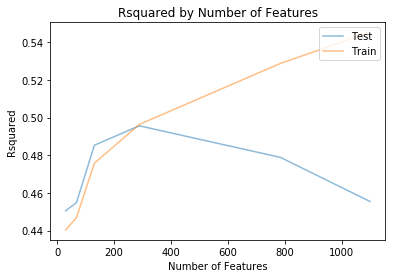

In [11]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [5000, 3500, 2500, 1000, 100, 50]

#Chart which will show us the correlated between the optimal model test and train
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = t.find_optimal_lm_mod(X, y, cutoffs)

In [12]:
print(X_train.shape[1]) #the optimal number of features based on the chart

289


In [13]:
print(r2_scores_test[np.argmax(r2_scores_test)]) # The model we should implement test_r2
print(r2_scores_train[np.argmax(r2_scores_test)]) # The model we should implement train_r2

0.495661841092
0.496409430283


In [14]:
def coef_weights(coefficients, X_train):
    '''
    This function is helping us to understand the correlation between JobSatisfaction and all the other columns inside the DataSet.
    The coefficient is the indication which is showing the estimation for each column correlation.
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)

    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the 20 top results
coef_df.head(20)

#job seeking status=not interested is TOP into JobSatisfaction
#carrer satisfaction is on the top for job satisfaction
#stack overflow job search=haven't done at all -> on the top for job satisfaction

#the overall conclusion is that all the people who didnt look for a job, either they have high CareerSatisfaction is that they have high JobSatisfaction


,est_int,coefs,abs_coefs
81,JobSeekingStatus_I am not interested in new jo...,0.871295,0.871295
0,CareerSatisfaction,0.688246,0.688246
247,StackOverflowJobSearch_Haven't done at all,0.565321,0.565321
82,"JobSeekingStatus_I'm not actively looking, but...",0.550019,0.550019
85,LastNewJob_More than 4 years ago,-0.357733,0.357733
249,StackOverflowNewQuestion_Haven't done at all,-0.317080,0.317080
199,InfluenceWorkstation_No influence at all,-0.257613,0.257613
248,StackOverflowJobSearch_Once or twice,0.256807,0.256807
200,InfluenceWorkstation_Not much influence,-0.227544,0.227544
83,LastNewJob_Between 2 and 4 years ago,-0.225255,0.225255
